# Kepler's Laws

Preliminaries:

In [1]:
%matplotlib notebook

import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

## Kepler's laws of planetary motion

In astronomy, Kepler's laws of planetary motion are three scientific laws describing the motion of planets around the Sun:

1. The orbit of a planet is an ellipse with the Sun at one of the two foci.
2. A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.
3. The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

source: [Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion)

***


## 1st Law: The orbit of a planet is an ellipse with the Sun at one of the two foci.

### 1. Cartesian equation
$$\frac {x^{2}}{a^{2}}+{\frac {y^{2}}{b^{2}}}=1 $$ 
$$ y=\pm {\frac {b}{a}}{\sqrt {a^{2}-x^{2}}}$$
$$ \text{focus:} \quad x_f=\pm \sqrt{a^2-b^2} $$

<IPython.core.display.Javascript object>


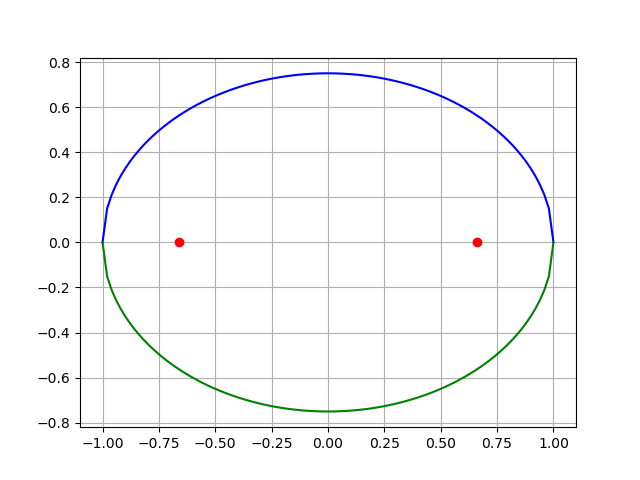

In [2]:
a=1.      # semi-major axis 
b=0.75    # semi-minor axis

c=np.sqrt(a**2-b**2)   # Focus of the ellipsis

x = np.linspace(-1, 1, 100)   

plt.figure()
plt.plot( x, b/a*np.sqrt(a**2-x**2),'b')
plt.plot( x, -b/a*np.sqrt(a**2-x**2),'g')
plt.plot([c,-c],[0,0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 2. Parametric equation
$$ x = a \cos{t} $$
$$ y = b \sin{t} $$
$$ 0 \ge t \le 2\pi $$
$$ \text{focus:} \quad x_f=\pm \sqrt{a^2-b^2} $$




<IPython.core.display.Javascript object>


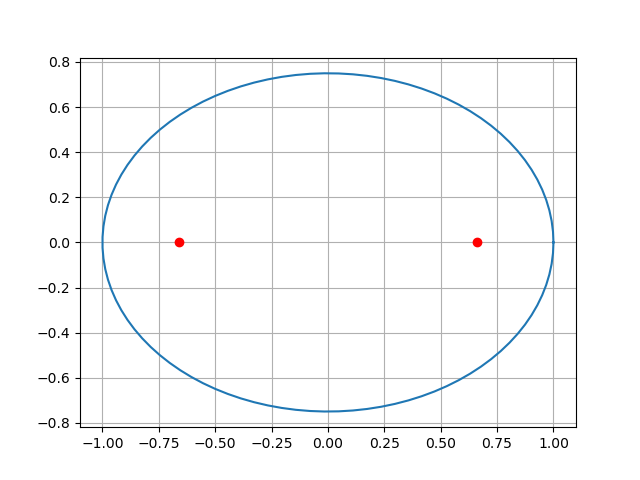

In [3]:
a=1.     # radius on the x-axis
b=0.75   # radius on the y-axis

c=np.sqrt(a**2-b**2)

t = np.linspace(0, 2*np.pi, 100)

plt.figure()
plt.plot( a*np.cos(t) , b*np.sin(t) )
plt.plot([c,-c],[0,0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 3. Cone section
The shape of the ellispe is defined in polar coordinates:

$$ r = \frac{e d}{1 + e \cos \theta} $$

Note that one focal point is in the origin of the coordinate system. The eccentricity is defined as

$$e=\frac{\sqrt{a^2-b^2}}{a}$$

and the factor $ed$ is given as

$$ed = \frac{b^2}{a} \ . $$

<IPython.core.display.Javascript object>


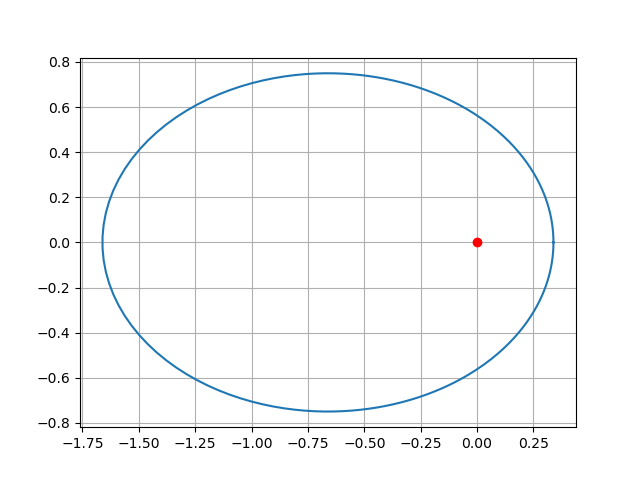

In [4]:
a=1.     # radius on the x-axis
b=0.75   # radius on the y-axis

e = np.sqrt(a**2-b**2)/a
ed = b**2/a

t = np.linspace(0, 2*np.pi, 200)

r = ed/(1+e*np.cos(t))

plt.figure()
plt.plot( r*np.cos(t) , r*np.sin(t) )
plt.plot([0],[0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 4. Interactive plot 1

In [5]:
def update_ell1(a, b):
    c = np.sqrt(a**2-b**2)
    t = np.linspace(0, 2*np.pi, 100)

    ell.set_data( a*np.cos(t) , b*np.sin(t)) 
    f1.set_data([c,-c],[0,0])
    plt.show()

<IPython.core.display.Javascript object>


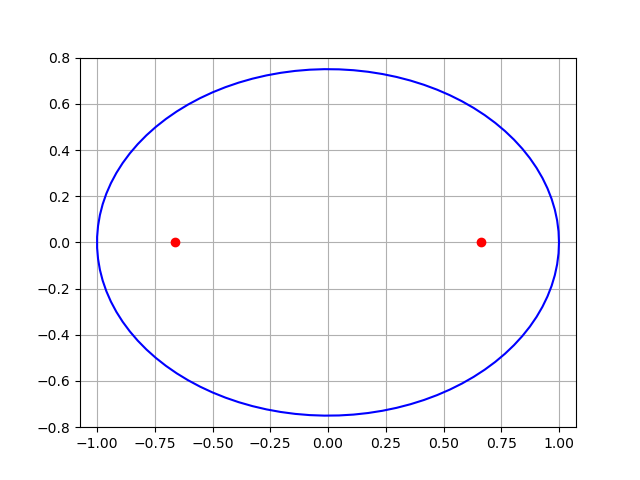

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, step=0.01), FloatSlider(value=0.75, des…

In [6]:
fig,ax = plt.subplots(1)

ax.axis('equal')
ax.grid(True)
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.8, 0.8])

ell, = ax.plot(1,1,color='b')
f1,  = ax.plot(1,1,color='r',marker='o',linestyle=' ')
ee = ax.text(0.4, 0.85, f'')

widgets.interact(update_ell1, \
         a=widgets.FloatSlider(min=0,max=1,step=0.01,value=1, description='a'), \
         b=widgets.FloatSlider(min=0,max=1,step=0.01,value=0.75, description='b') );

### 5. Interactive plot 2

In [7]:
def update_ell2(e, d):
    t = np.linspace(0, 2*np.pi, 100)
    r = e*d/(1+e*np.cos(t))
    ell.set_data( r*np.cos(t) , r*np.sin(t)) 
    f1.set_data([0],[0])
    plt.show()

<IPython.core.display.Javascript object>


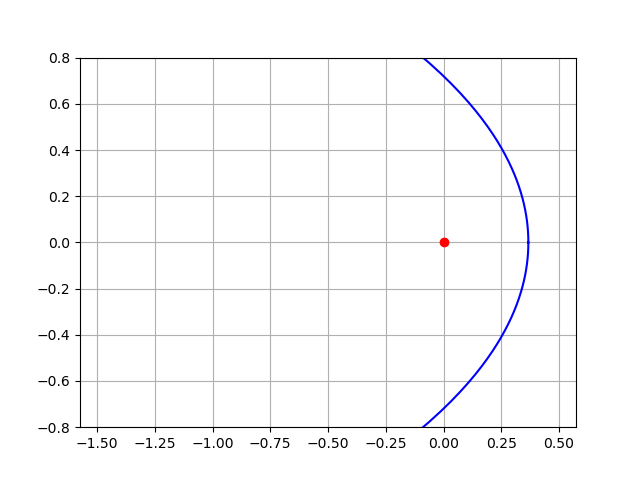

interactive(children=(FloatSlider(value=0.6, description='e', max=3.0, step=0.01), FloatSlider(value=0.75, des…

In [8]:
fig,ax = plt.subplots(1)

ax.axis('equal')
ax.grid(True)
ax.set_xlim([-2.1, 1.1])
ax.set_ylim([-0.8, 0.8])

ell, = ax.plot(1,1,color='b')
f1,  = ax.plot(1,1,color='r',marker='o',linestyle=' ')


widgets.interact(update_ell2, \
         e=widgets.FloatSlider(min=0,max=3,step=0.01,value=0.6, description='e'), \
         d=widgets.FloatSlider(min=0,max=2,step=0.01,value=0.75, description='d') );